In [1]:
import tensorflow as tf
import os
import numpy as np
from skimage.color import rgba2rgb

from matplotlib import pyplot as plt
%matplotlib inline
if not os.path.isdir('models'):
    os.mkdir('models')
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.5.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? False


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
#loading meta dataset
df = pd.read_csv('/Users/aydin/Desktop/deep_learning_project/mod.csv', index_col=0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2291 entries, 0 to 2290
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   link    2291 non-null   object
 1   main    2291 non-null   object
 2   dec     2291 non-null   object
 3   price   2291 non-null   object
 4   marka   2291 non-null   object
 5   target  2291 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 125.3+ KB


In [9]:
#loading the image dataset as numpy array
X = np.load('/Users/aydin/Desktop/deep_learning_project/mod.npy')

In [10]:
X.shape

(2291, 128, 128, 3)

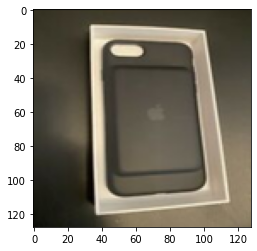

In [11]:
plt.imshow(X[0])

In [12]:
#first model to check the data
mobil_net=tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top=False,pooling='avg',
    weights='imagenet',input_shape=(128,128,3)
)
mobil_net.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [32]:
#first model to check the data
def model():
    model=tf.keras.models.Sequential([
        mobil_net,
        tf.keras.layers.Dense(1000,activation="relu"),
        tf.keras.layers.Dense(512,activation="relu"),
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dropout(0.5),
        
        
        tf.keras.layers.Dense(3,activation='softmax')
    
    ])
    model.layers[0].trainable=False
    model.compile(loss="categorical_crossentropy",optimizer='adam',
                  metrics=['accuracy'])
    return model

model= model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1281000   
_________________________________________________________________
dense_9 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 387       
Total params: 4,117,547
Trainable params: 1,859,563
Non-trainable params: 2,257,984
____________________________________

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
#onehotencoding for target values
co = OneHotEncoder()
co.fit(df[['target']])
y = co.transform(df[['target']])
y = y.toarray()

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [33]:
h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10, batch_size=32,
    
)

Epoch 1/10
65/65 [==============================] - 27s 373ms/step - loss: 1.0771 - accuracy: 0.4682 - val_loss: 0.9112 - val_accuracy: 0.5522
Epoch 2/10
65/65 [==============================] - 22s 346ms/step - loss: 0.8997 - accuracy: 0.5759 - val_loss: 0.9086 - val_accuracy: 0.6000
Epoch 3/10
65/65 [==============================] - 24s 362ms/step - loss: 0.7534 - accuracy: 0.6705 - val_loss: 0.9150 - val_accuracy: 0.5957
Epoch 4/10
65/65 [==============================] - 23s 357ms/step - loss: 0.6321 - accuracy: 0.7268 - val_loss: 1.0481 - val_accuracy: 0.6087
Epoch 5/10
65/65 [==============================] - 23s 356ms/step - loss: 0.5074 - accuracy: 0.7826 - val_loss: 1.1074 - val_accuracy: 0.5957
Epoch 6/10
65/65 [==============================] - 23s 354ms/step - loss: 0.3970 - accuracy: 0.8375 - val_loss: 1.3474 - val_accuracy: 0.5783
Epoch 7/10
65/65 [==============================] - 23s 348ms/step - loss: 0.2915 - accuracy: 0.8865 - val_loss: 1.3351 - val_accuracy: 0.5957

In [38]:
#showing examples 
class_names=['apple','samsung', 'other']
def examples(x, y, p):
    num = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[num]
    y = y[num]
    p = p[num]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        
        if p[i] == 0:
            name = class_names[0]  
        elif p[i] == 1:
            name = class_names[1] 
        elif p[i] == 2:
            name = class_names[2] 
        
        if y[i] == 0:
            name1 = class_names[0]  
        elif y[i] == 1:
            name1 = class_names[1] 
        elif y[i] == 2:
            name1 = class_names[2] 
            
        
        plt.xlabel(f'{name}, {name1}', color='green')
    plt.show()

In [36]:
y_pred = model.predict_classes(x_test)

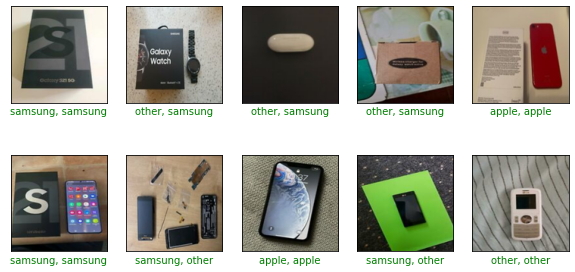

In [48]:
examples(x_test,np.argmax(y_test,1), y_pred)

In [50]:
sample_index = df.sample(220).index

In [310]:
# checking abnormal datas in subsetted dataset
#d = []
#o = []
#k = []
#for i in sample_index:
#    plt.imshow(X[i])
#    plt.show()
#    v = input('please enter: ')
#    if v == 'd':
#        d.append(i)
#    elif v == 'o':
#        o.append(i)
#    elif v == 'k':
#        k.append(i)
#    else:
#        continue

In [311]:
#for i in d:
#    plt.imshow(X[i])
#    plt.show()

In [55]:
d[5]

2048

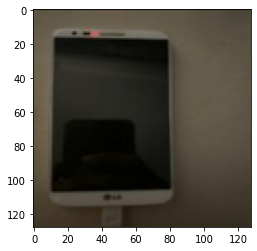

In [57]:
plt.imshow(X[2048])

In [58]:
d.pop(5)

2048

In [59]:
d

[156, 1284, 648, 63, 474, 964, 794, 1504, 1015, 1721, 2036]

In [61]:
#making a dataframe based on subsetted index
df_ = df.loc[sample_index]

In [62]:
#labeling abnormal datas
df_['defekt'] = [1 if i in d else 0 for i in sample_index]

In [63]:
df_.defekt.value_counts()

0    209
1     11
Name: defekt, dtype: int64

In [67]:
#splitting them
x_train, x_test, y_train, y_test = train_test_split(X[sample_index], df_.defekt, test_size=0.3, random_state=42)

In [66]:
#making a model to detect abnormal datas
def model():
    model=tf.keras.models.Sequential([
        mnet,
        tf.keras.layers.Dense(1000,activation="relu"),
        tf.keras.layers.Dense(512,activation="relu"),
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dropout(0.5),
        
        
        tf.keras.layers.Dense(1,activation='sigmoid')
    
    ])
    model.layers[0].trainable=False
    model.compile(loss="binary_crossentropy",optimizer='adam',
                  metrics=['accuracy'])
    return model

model=model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              1281000   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 4,117,289
Trainable params: 1,859,305
Non-trainable params: 2,257,984
____________________________________

In [70]:
t = model.fit(
    X[sample_index],  df_.defekt,
    validation_data=(x_test, y_test),
    epochs=10, batch_size=32,
    
)

Epoch 1/10
7/7 [==============================] - 3s 409ms/step - loss: 0.2306 - accuracy: 0.9591 - val_loss: 0.0939 - val_accuracy: 0.9545
Epoch 2/10
7/7 [==============================] - 3s 396ms/step - loss: 0.0598 - accuracy: 0.9818 - val_loss: 0.0289 - val_accuracy: 0.9848
Epoch 3/10
7/7 [==============================] - 3s 396ms/step - loss: 0.0108 - accuracy: 0.9955 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 3s 426ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 3s 396ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 3s 408ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 4.8342e-04 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 3s 408ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.0303e-04 - val_accuracy: 1.0000
Epoch 8/10
7

In [72]:
#predicting all abnormal datas in bigger datasets
y_pred = model.predict_classes(X)

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [312]:
#showing them
#p=y_pred.flatten()
#for i in range(len(p)):
#    if p[i] == 1:
#        plt.imshow(X[i])
#        plt.show()


In [ ]:
#cheking them manually
a = []
d = []
e = []
o = []
k = []

i = 0
while i < len(df.index):
    plt.imshow(X[i])
    plt.show()
    input_ = input('please enter the value: ')
    
    if input_ == 'a':
        a.append(i)
    
    elif input_ == 'd':
        d.append(i)
    
    elif input_ == 'e':
        e.append(i)
        
    elif input_ == 'o':
        o.append(i)
        
    elif input_ == 'k':
        k.append(i)
    
    check = input('are you sure: ')
    if check != '':
        i -= 1
    else:
        i += 1
    print(i)